<a href="https://colab.research.google.com/github/Rogerio-mack/Deep-Learning-I/blob/main/DL_TensorFlow_Binary_and_Multiclass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right"> 

<h1 align=left><font size = 6, style="color:rgb(0,0,0)"><b>Deep Learning</b></font></h1> 

# Classificação Binária e Multiclasse com o TensorFlow
Rogério de Oliveira

<br>
<br>

---


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [10]:
#@title Execute antes de seguir.
#@markdown Funções pré-definidas de report de classificação e plot da curva de aprendizado.

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def print_results(y_test, y_pred):
  print('\nConfusion Matrix: \n\n', confusion_matrix(y_test, y_pred))
  print('\nClassification Report: \n\n', classification_report(y_test, y_pred))
  print('\nAccuracy Score: \n\n', accuracy_score(y_test, y_pred), '\n')
  return

def display_acc_hist(history):
  history_df = pd.DataFrame(history.history)
  print('\n\nLearning Curve... \n\n')
  print('\n', history_df.head())
  # Start the plot at epoch 0
  history_df.loc[0:, ['loss', 'val_loss']].plot()
  history_df.loc[0:, [history_df.columns[1], history_df.columns[3]]].plot()

  print(("\nBest Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df[history_df.columns[2]].min(), 
              history_df[history_df.columns[3]].max()))
  print('\n ')
  return

# print_results(y_test_one, y_pred_one)
# display_acc_hist(history)



# **Binary Class Problem**

---

![imagem](https://upload.wikimedia.org/wikipedia/commons/thumb/4/43/Sagittal_balance.png/220px-Sagittal_balance.png)

<small>
<b>

Sagittal balance measurement.

## AQUISIÇÃO E EXPLORAÇÃO DOS DADOS
Variáveis preditoras e objetivo, número de classes, tipo dos dados etc.


In [11]:
df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/rpart/kyphosis.csv',index_col=0)
df.head()

,Kyphosis,Age,Number,Start
1,absent,71,3,5
2,absent,158,3,14
3,present,128,4,5
4,absent,2,5,1
5,absent,1,4,15


## PREPARAÇÃO DOS DADOS

Seleção de atributos, tratamento de nulos, encodes, normalização etc.


In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

X = df.drop(columns=['Kyphosis'])
y = df[['Kyphosis']]

# One Encode
#-------------------------------------------------------------------------------

y = y.replace({'absent':0,'present':1})

# Scale
#-------------------------------------------------------------------------------

scaler = MinMaxScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), columns = df.columns[1:4])   

# Show Results
#-------------------------------------------------------------------------------

print('\nEntradas para o Treinamento, X...\n')
display(X.head())
print('\nSaídas para o Treinamento, y....\n')
display(y.head())

# Conjuntos de Treinamento e Teste
#-------------------------------------------------------------------------------

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)


Entradas para o Treinamento, X...



,Age,Number,Start
0,0.341463,0.125,0.235294
1,0.765854,0.125,0.764706
2,0.619512,0.250,0.235294
3,0.004878,0.375,0.000000
4,0.000000,0.250,0.823529



Saídas para o Treinamento, y....



,Kyphosis
1,0
2,0
3,1
4,0
5,0


## **MODELO DEEP LEARNING BINARY CLASS**

Define, Compila, Treina e Avalia o modelo


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 3)                 12        
                                                                 
 dense_7 (Dense)             (None, 16)                64        
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 93
Trainable params: 93
Non-trainable params: 0
_________________________________________________________________


None


Confusion Matrix: 

 [[18  0]
 [ 7  0]]

Classification Report: 

               precision    recall  f1-score   support

           0       0.72      1.00      0.84        18
           1       0.00      0.00      0.00         7

    accuracy                           0.72        25
   macro avg       0.36      0.50      0.42        25
weighted avg       0.52      0.72      0.60        25


Accuracy Score: 

 0.72 



Learning Curve... 



        loss  binary_accuracy  val_loss  val_binary_accuracy
0  0.726250         0.153846  0.716755             0.235294
1  0.723057         0.153846  0.714335             0.235294
2  0.719786         0.153846  0.711990             0.235294
3  0.716781         0.153846  0.709717             0.235294
4  0.713586         0.153846  0.707475             0.235294

Best Validation Loss: 0.6238
Best Validation Accuracy: 0.7647

 


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


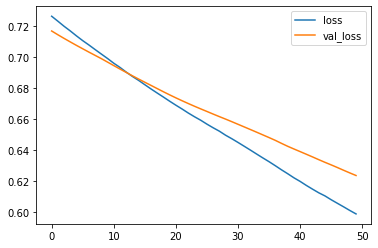

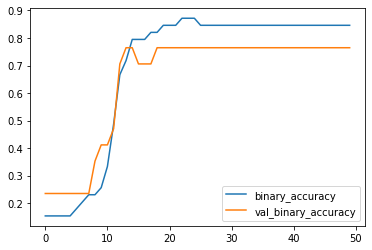

In [13]:
# imports
#-------------------------------------------------------------------------------

from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

# Define o Modelo
#-------------------------------------------------------------------------------

model = keras.Sequential(layers.Dense(X_train.shape[1], activation='relu', input_shape=[X_train.shape[1]])) # Entrada
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(y_train.shape[1], activation='sigmoid')) # Saída

display(model.summary())

# Compila o Modelo
#-------------------------------------------------------------------------------

model.compile(loss='binary_crossentropy',  # Multiclass loss
              optimizer='adam', 
              metrics=['binary_accuracy'])

# Treina o Modelo
#-------------------------------------------------------------------------------

history = model.fit(
    X_train, y_train,
    batch_size=32,
    validation_split=0.3,
    epochs=50,
    verbose=0,  
)

# Avalia o Modelo
#-------------------------------------------------------------------------------
y_pred = model.predict(X_test) > 0.5 # classes binárias, retorna a probabilidade de ser 1, então > 0.5 é classe 1, senão é classe 0

print_results(y_test, y_pred)
display_acc_hist(history)

In [14]:
y_pred

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False]])

# **Multi Class Problem**

---

![imagem](https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/220px-Iris_versicolor_3.jpg)

<small>
<b>

Iris Versicolor.

## AQUISIÇÃO E EXPLORAÇÃO DOS DADOS
Variáveis preditoras e objetivo, número de classes, tipo dos dados etc.


In [15]:
df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/iris.csv',index_col=0)
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


## PREPARAÇÃO DOS DADOS

Seleção de atributos, tratamento de nulos, encodes, normalização etc.


In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

X = df.drop(columns=['Species'])
y = df[['Species']]

# Hot Encode
#-------------------------------------------------------------------------------

hot_encode = OneHotEncoder(handle_unknown='ignore') 
hot_encode.fit(y)
y = pd.DataFrame(hot_encode.transform(y).toarray(), columns = hot_encode.categories_)  

# Scale
#-------------------------------------------------------------------------------

scaler = MinMaxScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), columns = df.columns[0:4])   

# Show Results
#-------------------------------------------------------------------------------

print('\nEntradas para o Treinamento, X...\n')
display(X.head())
print('\nSaídas para o Treinamento, y....\n')
display(y.head())

# Conjuntos de Treinamento e Teste
#-------------------------------------------------------------------------------

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)


Entradas para o Treinamento, X...



,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667



Saídas para o Treinamento, y....



,setosa,versicolor,virginica
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


## **MODELO DEEP LEARNING MULTI CLASS**

Define, Compila, Treina e Avalia o modelo


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 4)                 20        
                                                                 
 dense_10 (Dense)            (None, 8)                 40        
                                                                 
 dense_11 (Dense)            (None, 8)                 72        
                                                                 
 dense_12 (Dense)            (None, 3)                 27        
                                                                 
Total params: 159
Trainable params: 159
Non-trainable params: 0
_________________________________________________________________


None


Confusion Matrix: 

 [[18  0  0]
 [ 0  9  1]
 [ 0  1 16]]

Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.90      0.90      0.90        10
           2       0.94      0.94      0.94        17

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45


Accuracy Score: 

 0.9555555555555556 



Learning Curve... 



        loss  accuracy  val_loss  val_accuracy
0  1.119535  0.273973  1.083452       0.40625
1  1.114101  0.273973  1.081781       0.40625
2  1.110325  0.273973  1.080380       0.40625
3  1.105963  0.273973  1.079172       0.40625
4  1.102607  0.273973  1.078126       0.40625

Best Validation Loss: 0.6766
Best Validation Accuracy: 0.9062

 


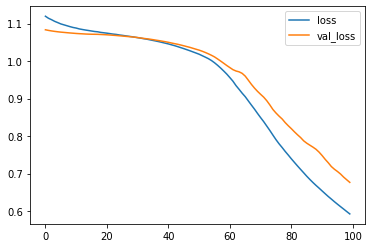

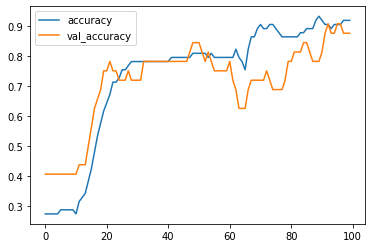

In [17]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

# Define o Modelo
#-------------------------------------------------------------------------------

model = keras.Sequential(layers.Dense(X_train.shape[1], activation='relu', input_shape=[X_train.shape[1]])) # Entrada
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(y_train.shape[1], activation='sigmoid')) # Saída

display(model.summary())

# Compila o Modelo
#-------------------------------------------------------------------------------

model.compile(loss='categorical_crossentropy',  # Multiclass loss
              optimizer='adam', 
              metrics=['accuracy'])

# Treina o Modelo
#-------------------------------------------------------------------------------

history = model.fit(
    X_train, y_train,
    batch_size=32,
    validation_split=0.3,
    epochs=100,
    verbose=0,  
)

# Avalia o Modelo
#-------------------------------------------------------------------------------
y_pred_one = np.argmax(model.predict(X_test), axis=1)
y_test_one = np.argmax(np.array(y_test), axis=1)

print_results(y_test_one, y_pred_one)
display_acc_hist(history)

# Experimente Você... 

## Dados para Classificação Binária

In [18]:
df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/AER/HealthInsurance.csv',index_col=0)
df.head()

,health,age,limit,gender,insurance,married,selfemp,family,region,ethnicity,education
1,yes,31,no,male,yes,yes,yes,4,south,cauc,bachelor
2,yes,31,no,female,yes,yes,no,4,south,cauc,highschool
3,yes,54,no,male,yes,yes,no,5,west,cauc,ged
4,yes,27,no,male,yes,no,no,5,west,cauc,highschool
5,yes,39,no,male,yes,yes,no,5,west,cauc,none


## Dados para Classificação Multi Classe

In [19]:
df = pd.read_csv('http://meusite.mackenzie.br/rogerio/STEEL_faults.csv')
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,1687,1,0,80,0.0498,0.2415,0.1818,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,1687,1,0,80,0.7647,0.3793,0.2069,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,1623,1,0,100,0.9710,0.3426,0.3333,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,1353,0,1,290,0.7287,0.4413,0.1556,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,1353,0,1,185,0.0695,0.4486,0.0662,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0
